
## Word2Vec Model
- Word2Vec Google's Pretrained Model
- Contains vector representations of 50 billion words

- Words which are similar in context have similar vectors
- Distance/Similarity between two words can be measured using Cosine Distance


### Applications
- Text Similarity
- Language Translation
- Finding Odd Words
- Word Analogies


### Word Embeddings
- Word embeddings are numerical representation of words, in the form of vectors.

- Word2Vec Model represents each word as 300 Dimensional Vector

- In this tutorial we are going to see how to use pre-trained word2vec model.
- Model size is around 3.5 GB
- We will work using Gensim, which is popular NLP Package.


Gensim's Word2Vec Model provides optimum implementation of 

1) **CBOW** Model 

2) **SkipGram Model**


Paper 1 [Efficient Estimation of Word Representations in
Vector Space](https://arxiv.org/pdf/1301.3781.pdf)


Paper 2 [Distributed Representations of Words and Phrases and their Compositionality
](https://arxiv.org/abs/1310.4546)

### Word2Vec using Gensim
`Link https://radimrehurek.com/gensim/models/word2vec.html`

### CODE ##

##### Load Word2Vec Model


**KeyedVectors** - This object essentially contains the mapping between words and embeddings. After training, it can be used directly to query those embeddings in various ways

In [1]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import scipy
import numpy

In [2]:
print(gensim.__version__)

4.3.3


In [3]:
print(scipy.__version__,numpy.__version__)

1.13.1 1.26.4


In [4]:
path = r"C:\Users\abhis\Downloads\GoogleNews-vectors-negative300.bin\GoogleNews-vectors-negative300.bin"

In [5]:
word_vectors = KeyedVectors.load_word2vec_format(path,binary=True)

In [21]:
v_apple = word_vectors["India"] 
v_mango = word_vectors["Moscow"]

In [22]:
print(v_apple.shape)
print(v_mango.shape)
print(v_apple)

(300,)
(300,)
[-3.24707031e-02  6.10351562e-02  1.72851562e-01  2.53906250e-01
 -1.97265625e-01 -1.55273438e-01  1.06933594e-01 -2.31445312e-01
 -2.09960938e-01 -2.58789062e-02 -1.32812500e-01 -1.04492188e-01
  3.32031250e-01 -1.74804688e-01  1.45874023e-02 -7.12890625e-02
  1.62353516e-02  6.59179688e-02 -1.54418945e-02  5.12695312e-02
  7.05718994e-05 -1.47460938e-01  2.57873535e-03 -1.23046875e-01
  1.02539062e-01  1.39648438e-01 -3.88671875e-01 -1.63085938e-01
 -8.93554688e-02  7.27539062e-02 -9.66796875e-02 -2.79296875e-01
 -4.23828125e-01  4.24804688e-02  2.74658203e-02 -8.74023438e-02
 -2.17773438e-01 -5.34667969e-02  2.91015625e-01  3.44238281e-02
  8.44726562e-02  8.15429688e-02 -3.78417969e-02  2.40234375e-01
 -2.89306641e-02 -2.33154297e-02 -2.27539062e-01  7.51953125e-02
  1.80664062e-01  2.92968750e-02  5.20019531e-02  1.51367188e-01
  1.47247314e-03 -2.85644531e-02  2.56347656e-02  3.12500000e-02
 -1.76757812e-01 -1.55273438e-01  2.92968750e-02 -2.12890625e-01
  1.1657714

In [24]:
cosine_similarity([v_mango],[v_apple])

array([[0.22440825]], dtype=float32)

In [25]:
import numpy as np

## 1. Find the Odd One Out

In [26]:
def odd_one_out(words):
    """Accepts a list of words and returns the odd word"""
    
    # Generate all word embeddings for the given list
    all_word_vectors = [word_vectors[w] for w in words]
    avg_vector = np.mean(all_word_vectors,axis=0)
    print(avg_vector.shape)
    
    #Iterate over every word and find similarity
    odd_one_out = None
    min_similarity = 1.0 #Very high value
    
    for w in words:
        sim = cosine_similarity([word_vectors[w]],[avg_vector])
        if sim < min_similarity:
            min_similarity = sim
            odd_one_out = w
    
        print("Similairy btw %s and avg vector is %.2f"%(w,sim[0][0]))
            
    return odd_one_out

In [31]:
input_1 = ["apple","mango","juice","party","orange"] 
input_2 = ["music","dance","sleep","dancer","food"]        
input_3  = ["match","player","football","cricket","dancer"]
input_4 = ["india","italy","england","france","germany"]

In [28]:
odd_one_out(input_1) 

(300,)
Similairy btw apple and avg vector is 0.78
Similairy btw mango and avg vector is 0.76
Similairy btw juice and avg vector is 0.71
Similairy btw party and avg vector is 0.36
Similairy btw orange and avg vector is 0.65


'party'

In [29]:
odd_one_out(input_2) 

(300,)
Similairy btw music and avg vector is 0.66
Similairy btw dance and avg vector is 0.81
Similairy btw sleep and avg vector is 0.51
Similairy btw dancer and avg vector is 0.72
Similairy btw food and avg vector is 0.52


'sleep'

In [30]:
odd_one_out(input_3)

(300,)
Similairy btw match and avg vector is 0.58
Similairy btw player and avg vector is 0.68
Similairy btw football and avg vector is 0.72
Similairy btw cricket and avg vector is 0.70
Similairy btw dancer and avg vector is 0.53


'dancer'

In [32]:
odd_one_out(input_4)

(300,)
Similairy btw india and avg vector is 0.79
Similairy btw italy and avg vector is 0.81
Similairy btw england and avg vector is 0.84
Similairy btw france and avg vector is 0.83
Similairy btw germany and avg vector is 0.83


'india'

### 2. Word Analogies Task

In the word analogy task, we complete the sentence "a is to b as c is to __". An example is 'man is to woman as king is to queen' . In detail, we are trying to find a word d, such that the associated word vectors `ea,eb,ec,ed` are related in the following manner: `eb−ea≈ed−ec`. We will measure the similarity between `eb−ea` and `ed−ec` using cosine similarity. 

![Word2Vec](./images/word2vec.png)

`man -> woman :: 	prince -> princess`  
`italy -> italian :: 	spain -> spanish`  
`india -> delhi :: 	japan -> tokyo`  
`man -> woman :: 	boy -> girl`  
`small -> smaller :: 	large -> larger`  

#### Try it out 


`man -> coder :: woman -> ______?`


In [33]:
len(word_vectors.index_to_key)

3000000

In [34]:
word_vectors["man"].shape

(300,)

In [35]:
def predict_word(a,b,c,word_vectors):
    """Accepts a triad of words, a,b,c and returns d such that a is to b : c is to d"""
    a,b,c = a.lower(),b.lower(),c.lower()
    
    # similarity |b-a| = |d-c| should be max
    max_similarity = -100 
    
    d = None
    
    words = list(word_vectors.index_to_key)
    
    wa,wb,wc = word_vectors[a],word_vectors[b],word_vectors[c]
    
    #to find d s.t similarity(|b-a|,|d-c|) should be max
    
    for w in words:
        if w in [a,b,c]:
            continue
        
        wv = word_vectors[w]
        sim = cosine_similarity([wb-wa],[wv-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = w
            
    return d    

In [59]:
triad_2 = ("man","woman","prince")
predict_word(*triad_2,word_vectors)


KeyboardInterrupt: 

## Using the Most Similar Method

In [40]:
word_vectors.most_similar(positive=['King', 'Princess'], negative=['Queen'], topn=10)

[('Prince', 0.5361544489860535),
 ('princess', 0.40959128737449646),
 ('Frederik_IX', 0.4037315249443054),
 ('Tupou_V.', 0.40252795815467834),
 ('KIng', 0.3937373459339142),
 ('born_Cassius_Marcellus', 0.38667622208595276),
 ('Legend_Zelda_Twilight', 0.3862988352775574),
 ('prince', 0.3833954632282257),
 ('Lucy_Lawless_Xena_Warrior', 0.3831879794597626),
 ('Maha_Chakri_Sirindhorn', 0.38202932476997375)]

## 3. Training Your Own Word2Vec Model

Word2Vec model can learn embeddings from any text corpus!
- Continuous Bag of Words Model
- Skip Gram Model

`Algorithm looks at window of target word(Y) to provide context word(X), the model is trained on (X,Y) pairs in a superwised manner.` The algorithm was developed by Tomas Mikolov.

#### Data Preparation



- Each sentence must be tokenized, into a list of words.

- The sentences can be text loaded into memory once,
or we can build a data pipeline which iteratively feeds data to the model.


In [41]:
import nltk
from nltk.corpus import stopwords

In [42]:
stopw  = set(stopwords.words('english'))

In [102]:
## Read the file 
def readFile(file): 
    f = open(file,'r',encoding='utf-8')
    text = f.read()
    sentences = nltk.sent_tokenize(text)
    
    data = []
    for sent in sentences:
        words =  nltk.word_tokenize(sent)
        words = [w.lower() for w in words if len(w)>2 and w not in stopw]
        data.append(words)
        
    return data

text = readFile('bollywood.txt')

In [103]:
print(text)

[['deepika', 'padukone', 'ranveer', 'singh', 'wedding', 'one', 'biggest', 'bollywood', 'events', 'happened', '2018'], ['the', 'deepika', 'ranveer', 'celebrations', 'hooked', 'phones', 'waiting', 'come', 'also', 'gave', 'enough', 'reason', 'believe', 'stylish', 'two', 'couple'], ['from', 'airport', 'looks', 'reception', 'parties', 'everything', 'entire', 'timeline', 'deepika', 'ranveer', 'wedding', 'style', 'file'], ['not', 'ambanis', 'deepika', 'ranveer', 'priyanka', 'nick'], ['man', 'proves', 'wedding', 'the', 'year', 'this', 'year', 'year', 'big', 'fat', 'lavish', 'extravagant', 'weddings'], ['from', 'isha', 'ambani', 'anand', 'piramal', 'deepika', 'padukone', 'ranveer', 'singh', 'priyanka', 'chopra', 'nick', 'jonas', 'kapil', 'sharma', 'ginni', 'chatrath', '2018', 'saw', 'many', 'grand', 'weddings'], ['but', 'nothing', 'beats', 'man', 'wedding', 'the', 'year', 'award', 'social', 'media'], ['priyanka', 'also', 'shared', 'video', 'featuring', 'nick', 'jonaswas', 'also', 'celebrating',

In [104]:
from gensim.models import Word2Vec

In [105]:
model = Word2Vec(text,vector_size=100,window=5,min_count=1,epochs = 50)

In [106]:
print(model)

Word2Vec<vocab=116, vector_size=100, alpha=0.025>


In [107]:
words = list(model.wv.index_to_key)

In [108]:
print(words)

['year', 'priyanka', 'nick', 'deepika', 'ranveer', 'wedding', 'the', 'chopra', 'sharma', 'ginni', 'weddings', 'jonas', 'kapil', 'chatrath', 'anand', '2018', 'isha', 'ambani', 'piramal', 'saw', 'from', 'new', 'also', 'man', 'singh', 'padukone', 'virat', 'many', 'grand', 'but', 'nothing', 'beats', 'award', 'media', 'shared', 'anushka', 'style', 'couple', 'two', 'social', 'big', 'fat', 'celebrations', 'this', 'december', 'married', 'friends', 'lavish', 'extravagant', 'one', 'entire', 'parties', 'everything', 'timeline', 'file', 'not', 'ambanis', 'pink', 'events', 'happened', 'reception', 'bollywood', 'squad', 'hooked', 'phones', 'waiting', 'come', 'biggest', 'gave', 'enough', 'reason', 'believe', 'stylish', 'attire', 'dress', 'looks', 'airport', 'side', 'morning', 'jaggo', 'celebration', 'verbier', 'switzerland', 'three', 'receptions', 'delhi', 'mumbai', 'night', 'proves', 'made', 'even', 'special', 'industry', 'long', 'time', 'there', 'glimpses', 'outstanding', 'pictures', 'london', 'ran

In [109]:
print(model.wv["deepika"])

[-6.1195255e-03  1.3705674e-02 -8.2049303e-04 -3.2485421e-03
  5.8649960e-03 -1.2135876e-02  5.8262823e-03  1.5975872e-02
  3.3050554e-03 -1.2976194e-02  7.4676322e-03 -1.1227435e-03
  4.1530472e-03 -3.3622871e-03  1.1030754e-02 -4.5800433e-03
  9.2539135e-03 -8.1170648e-03 -9.2670880e-03 -2.3281442e-03
  4.1571199e-03 -1.6183725e-03  1.0545869e-02  6.5447600e-03
 -1.0894571e-02  4.5316233e-03  2.0998486e-03  2.8855398e-03
  7.6868426e-04 -4.1527284e-04  3.1913300e-03 -3.6544814e-03
 -4.9056611e-03 -8.1394501e-03  1.8938819e-03  1.2299319e-02
  1.0550937e-02 -9.2515144e-03 -9.8368265e-03  3.7860209e-03
  4.2752610e-03  2.7769373e-03  4.2373897e-03 -3.2371429e-03
  1.1592001e-02  2.7151450e-03 -2.9872106e-05 -4.8663816e-03
 -5.2060344e-04 -2.1685491e-04  6.2137353e-03 -3.4070767e-03
 -9.3675107e-03 -1.1387397e-02 -5.0805928e-03  2.2291678e-03
  2.8788168e-03  9.1790752e-03  1.7684097e-03 -4.9079638e-03
  2.4599792e-03  4.8102099e-03  9.0326630e-03  3.7278875e-04
  3.0094690e-03  2.08012

In [110]:
#model.wv.vocab

In [111]:
import numpy as np

In [112]:
all_vectors = [model.wv[w] for w in model.wv.index_to_key]
all_vectors = np.array(all_vectors)
print(all_vectors.shape)
print(all)

(116, 100)
<built-in function all>


In [113]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=1)
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=1)
# tsne = TSNE(n_components=2, verbose=1,n_iter=1000,random_state=1)

tsne_results = tsne.fit_transform(all_vectors)

[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.000s...
[t-SNE] Computed neighbors for 116 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 0.021803
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.026875
[t-SNE] KL divergence after 300 iterations: 0.906286


C:\Users\abhis\miniconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [114]:
print(tsne_results)

[[-4.3364978e-01  3.3488700e+00]
 [-8.4030282e-01  4.6339617e+00]
 [-6.1423081e-01  2.0981445e+00]
 [ 3.7273228e+00 -3.1767673e+00]
 [-1.1847148e+00  8.6162430e-01]
 [ 2.1546302e+00 -5.0088210e+00]
 [ 4.5947272e-01  1.5157378e+00]
 [-1.7407976e+00  1.0382814e+00]
 [ 2.4023504e+00 -2.9866459e+00]
 [ 3.2569900e+00  6.6284055e-01]
 [-3.9071372e+00 -5.6180060e-01]
 [-9.3038714e-01  2.2437901e+00]
 [ 9.1927552e-01 -2.1353767e+00]
 [-2.2159073e+00 -2.0113537e-01]
 [-1.0934738e+00 -1.5562400e+00]
 [ 3.4010413e-01 -1.5359143e+00]
 [ 2.5666444e+00  2.7879467e+00]
 [-1.8404040e+00 -1.1639469e+00]
 [-1.2586731e-01  4.3044186e+00]
 [-1.8151904e+00  1.1870394e+00]
 [ 1.8176522e+00 -1.2841055e+00]
 [-1.3635510e+00  2.5081999e+00]
 [-1.2609626e+00  4.4531021e+00]
 [ 8.4278363e-01 -4.1225524e+00]
 [-7.1630764e-01 -4.9536777e+00]
 [-4.2479891e-01  4.2496398e-01]
 [-9.3889201e-01  5.3661126e-01]
 [ 3.0379686e+00 -2.2157519e+00]
 [ 5.5106854e-01  2.0423110e+00]
 [ 2.2308068e+00  5.2219504e-01]
 [ 1.80159

In [115]:
import matplotlib.pyplot as plt

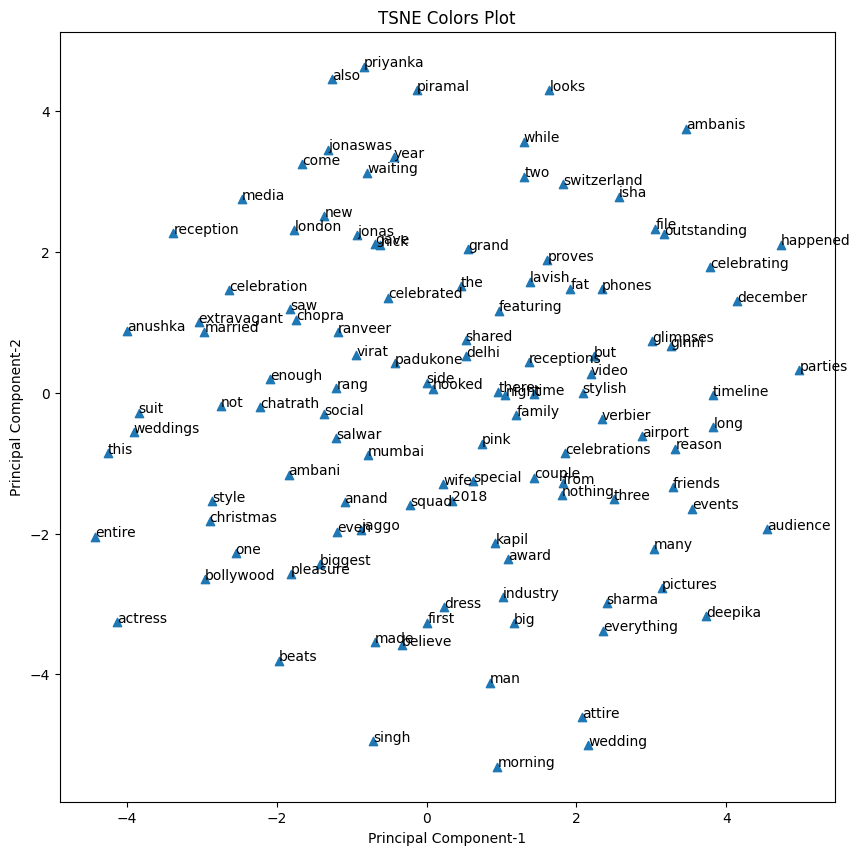

In [116]:
data = tsne_results

plt.figure(figsize=(10,10))
# plt.style.use('seaborn')
plt.scatter(data[:,0],data[:,1],marker='^')

keys = model.wv.index_to_key
for label, x, y in zip(keys, data[:,0], data[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    
plt.xlabel("Principal Component-1")
plt.ylabel("Principal Component-2")
plt.title("TSNE Colors Plot")
plt.show()

In [117]:
actors = ["ranveer","deepika","padukone","singh","nick","jonas","chopra","priyanka","virat","anushka","ginni"]


def predict_actor(a,b,c,word_vectors):
    """Accepts a triad of words, a,b,c and returns d such that a is to b : c is to d"""
    a,b,c = a.lower(),b.lower(),c.lower()
    max_similarity = -100 
    
    d = None
    words = actors
    
    wa,wb,wc = word_vectors[a],word_vectors[b],word_vectors[c]
    
    #to find d s.t similarity(|b-a|,|d-c|) should be max
    
    for w in words:
        if w in [a,b,c]:
            continue
        
        wv = word_vectors[w]
        sim = cosine_similarity([wb-wa],[wv-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = w
    return d    

### 4. Test your Model

In [118]:
triad = ("nick","priyanka","virat")
predict_actor(*triad,model.wv)

'deepika'

In [119]:
triad = ("ranveer","deepika","priyanka")
predict_actor(*triad,model.wv)

'singh'

In [120]:
triad = ("ranveer","singh","deepika")
predict_actor(*triad,model.wv)

'ginni'

In [121]:
triad = ("deepika","padukone","priyanka")
predict_actor(*triad,model.wv)

'virat'

In [122]:
triad = ("priyanka","jonas","nick")
predict_actor(*triad,model.wv)

'chopra'

![Image](./images/p2.gif)


In [481]:
model.wv.save_word2vec_format("bollywood.bin")